In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

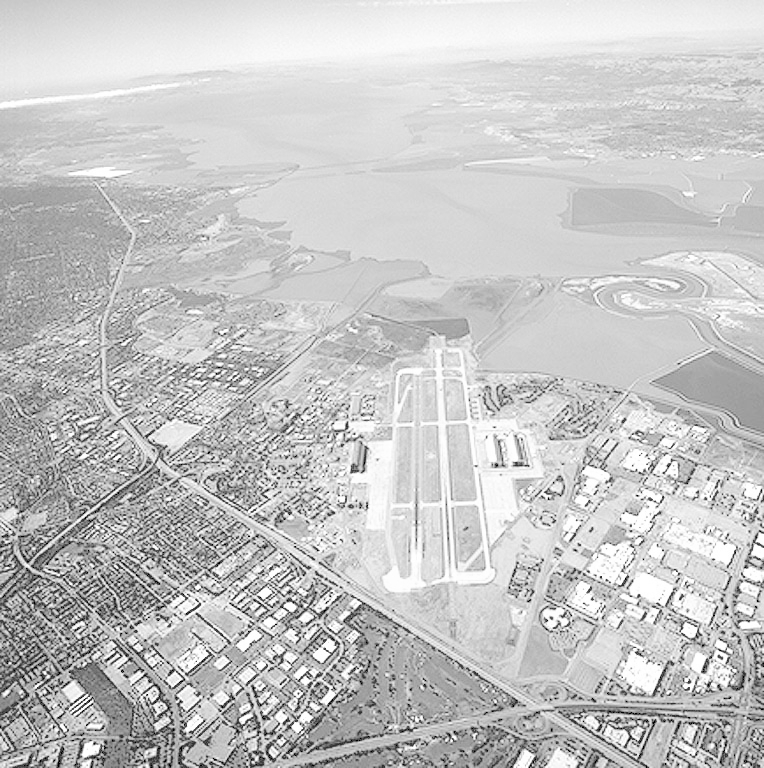

In [8]:
pil_im = Image.open('../runway.jpg')
pil_im

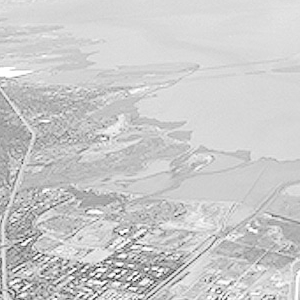

In [9]:
box = (100,100,400,400)
region = pil_im.crop(box)
region

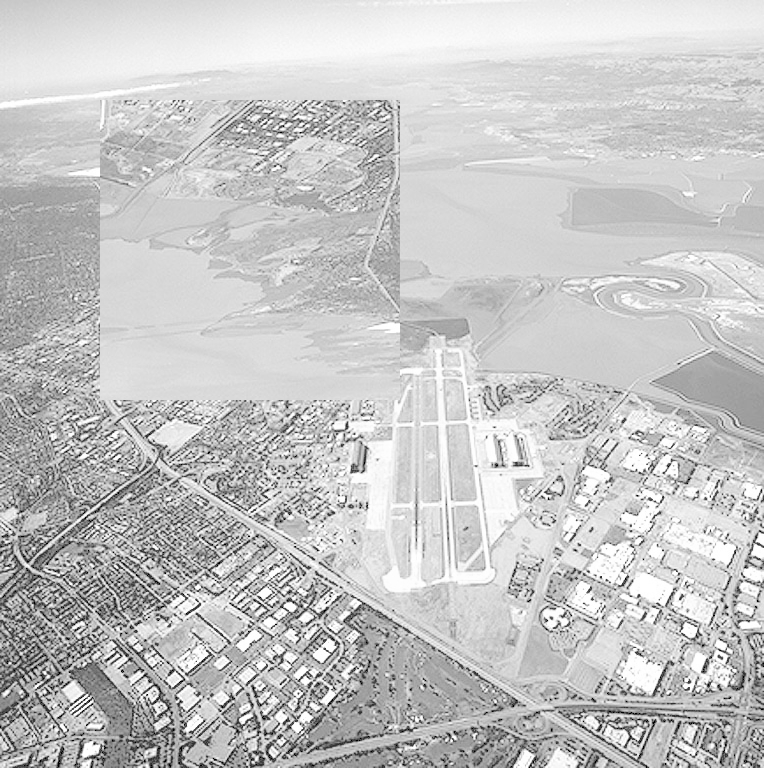

In [10]:
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region,box)
pil_im

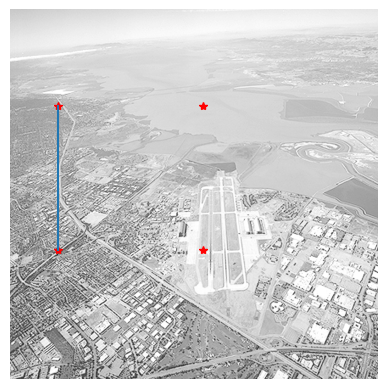

In [16]:
# read image to array
im = np.array(Image.open('../runway.jpg').convert('L'))
plt.imshow(im, cmap='gray')

# some points
x = [100,100,400,400]
y = [200,500,200,500]

plt.plot(x, y, 'r*')

plt.plot(x[:2], y[:2])
plt.axis('off')
plt.show()

In [17]:
im = np.array(Image.open('../runway.jpg').convert('L'))

(0.5, 763.5, 0.5, 767.5)

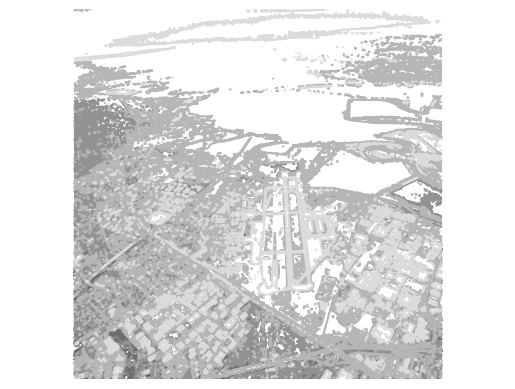

In [18]:
plt.figure()
plt.gray()

plt.contour(im, origin = 'image')
plt.axis('equal')
plt.axis('off')

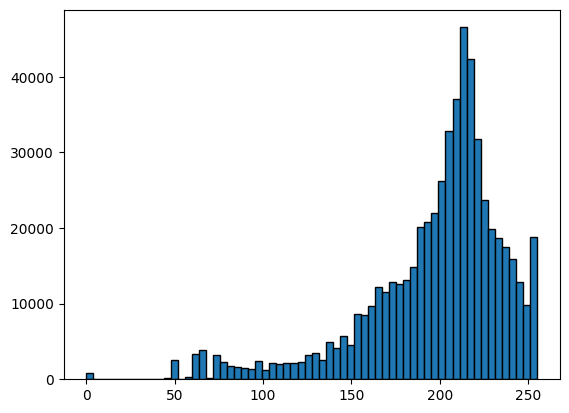

In [45]:
plt.figure()
plt.hist(x=im.flatten(), bins=64, edgecolor='black')
plt.show()

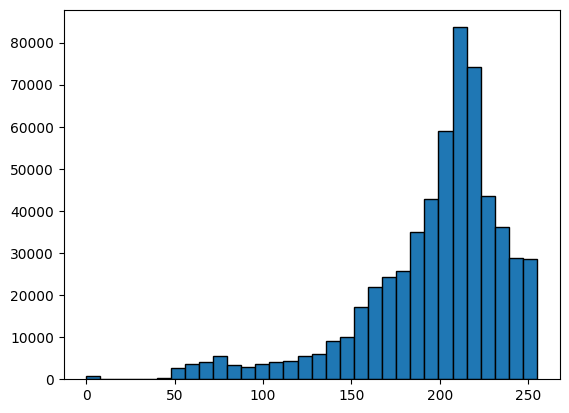

In [48]:
plt.figure()
plt.hist(x=im.flatten(), bins=32, edgecolor='black')
plt.show()

In [50]:
im = np.array(Image.open('../Handling-Processing/baby.jpg'))
im.shape, im.dtype

((1080, 1080, 3), dtype('uint8'))

In [51]:
im = np.array(Image.open('../Handling-Processing/baby.jpg').convert('L'), 'f')
im.shape, im.dtype

((1080, 1080), dtype('float32'))

In [21]:
im[:100, :50].shape

(100, 50)

### Graylevel Transforms

In [77]:
im = np.array(Image.open('../runway.jpg').convert('L'))
im2 = 255 - im # invert image
im3 = (100.0 / 255) * im + 100 # clamp to interval 100 ... 200
im4 = 255.0 * (im * 255.0) ** 2 # squared

In [78]:
print(im.min(), im.max(), im.shape)
print(im2.min(), im2.max(), im2.shape)
print(im3.min(), im3.max(), im3.shape)
print(im4.min(), im4.max(), im4.shape)


0 255 (768, 764)
0 255 (768, 764)
100.0 200.0 (768, 764)
0.0 1078203909375.0 (768, 764)


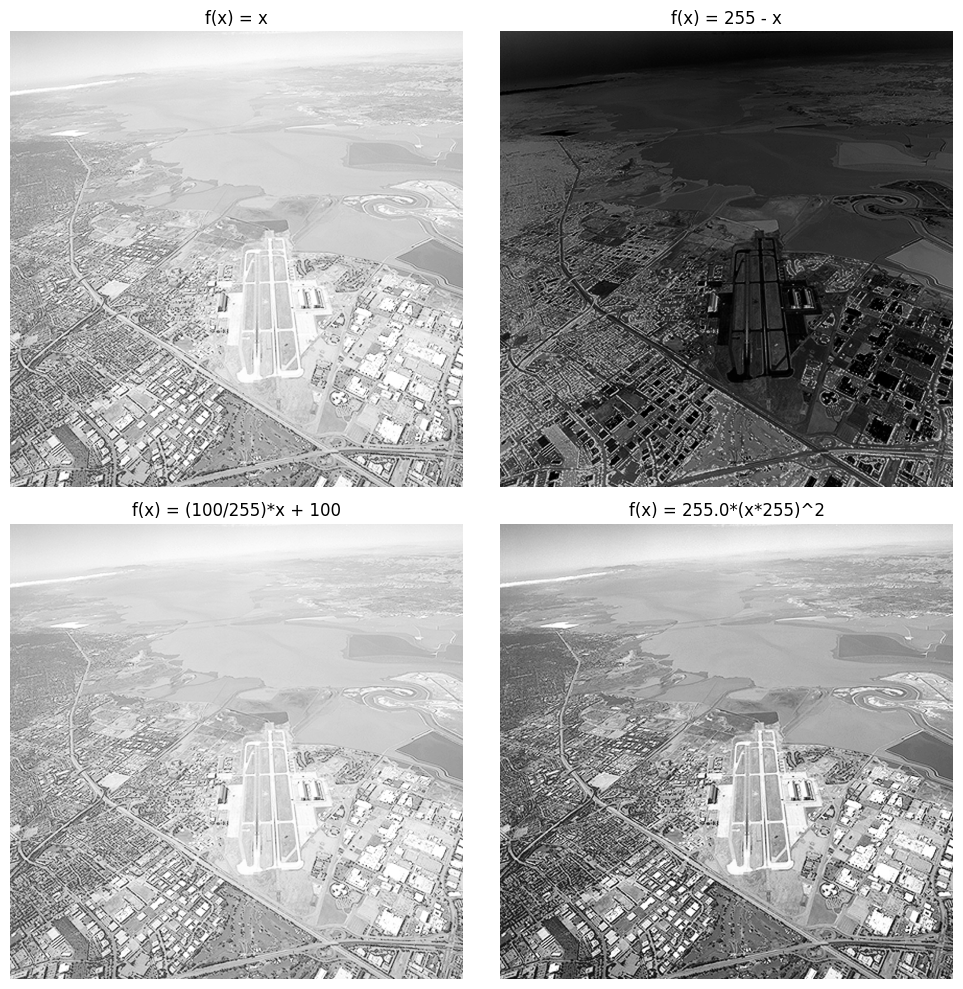

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(im)
axes[0, 0].set_title('f(x) = x')
axes[0, 0].axis('off')

axes[0, 1].imshow(im2)
axes[0, 1].set_title('f(x) = 255 - x')
axes[0, 1].axis('off')

axes[1, 0].imshow(im3)
axes[1, 0].set_title('f(x) = (100/255)*x + 100')
axes[1, 0].axis('off')

axes[1, 1].imshow(im4)
axes[1, 1].set_title('f(x) = 255.0*(x*255)^2')
axes[1, 1].axis('off')

plt.tight_layout() 
plt.show()

In [84]:
f1 = lambda x: x
f2 = lambda x: 255 - x
f3 = lambda x: (100.0 / 255.0) * x + 100
f4 = lambda x: 255.0 * (x / 255.0) ** 2
x = np.linspace(0, 255)

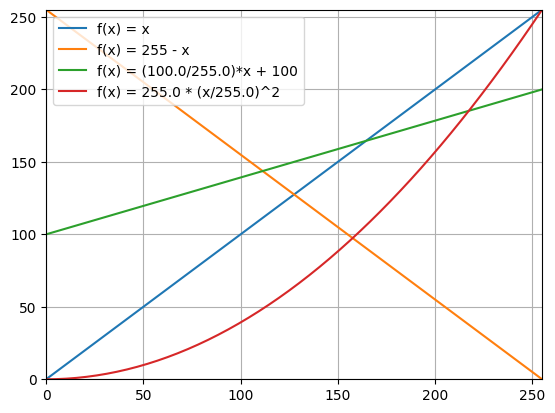

In [83]:
plt.plot(x, f1(x), label='f(x) = x')
plt.plot(x, f2(x), label='f(x) = 255 - x')
plt.plot(x, f3(x), label='f(x) = (100.0/255.0)*x + 100')
plt.plot(x, f4(x), label='f(x) = 255.0 * (x/255.0)^2')
plt.xlim(min(x), max(x))
plt.ylim(min(x), max(x))
plt.legend(loc='upper left')
plt.grid()
plt.show()

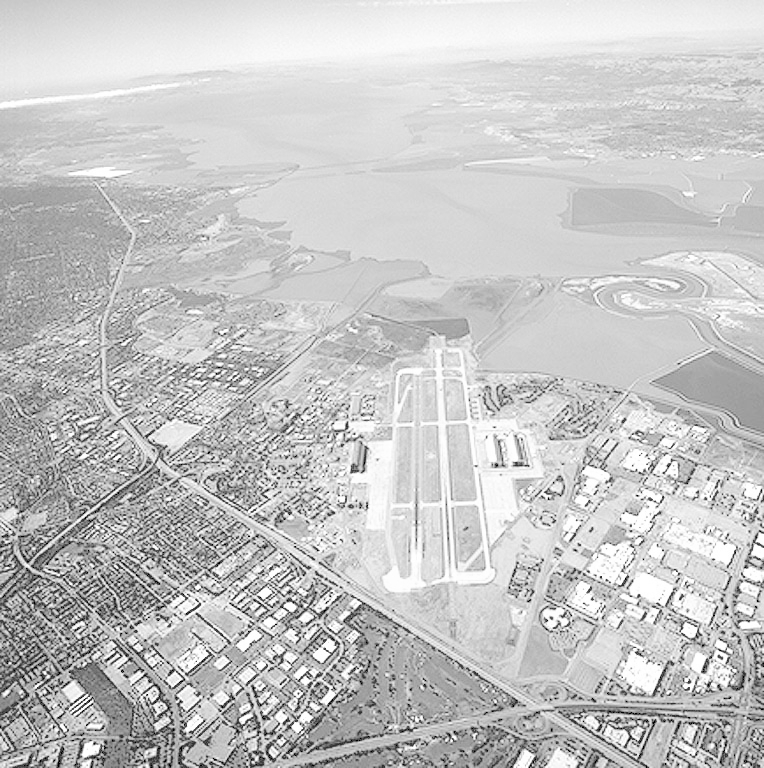

In [86]:
pil_im = Image.fromarray(np.uint8(im))
pil_im

### histogram equalization

In [96]:
def histeq(im,nbr_bins=256):
    """ Histogram equalization of a grayscale image. """
    # get image histogram
    imhist, bins = np.histogram(im.flatten(),nbr_bins)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    im2 = np.interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape), cdf

In [97]:
im = np.array(Image.open('../runway.jpg').convert('L'))
im2,cdf = histeq(im)

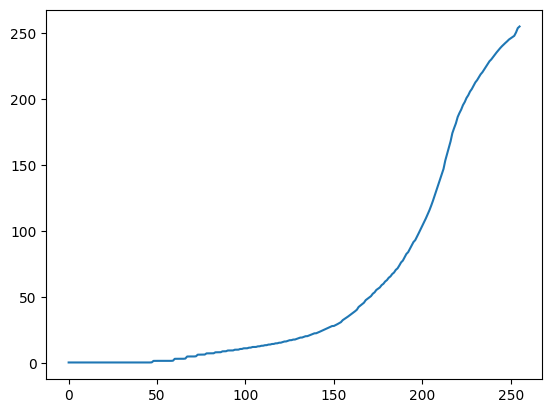

In [113]:
plt.plot(cdf)
plt.show()

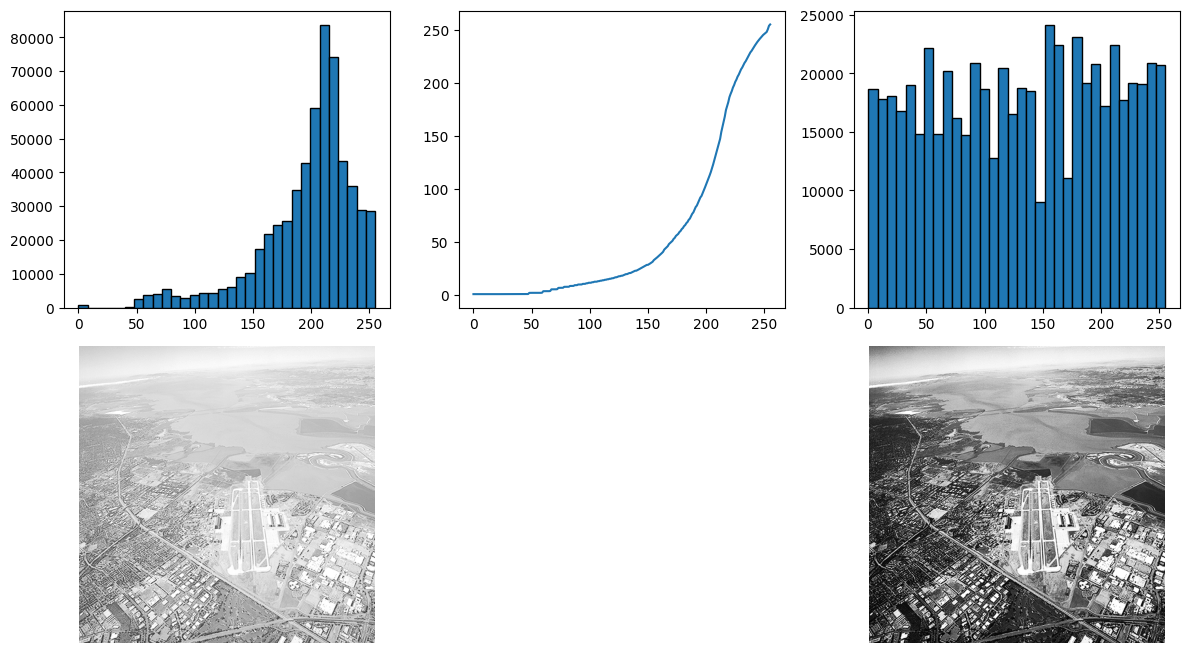

In [121]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.hist(x=im.flatten(), bins=32, edgecolor='black')

plt.subplot(3, 3, 2)
plt.plot(cdf)

plt.subplot(3, 3, 3)
plt.hist(x=im2.flatten(), bins=32, edgecolor='black')

plt.subplot(3, 3, 4)
plt.imshow(im)
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(im2)
plt.axis('off')

plt.tight_layout()
plt.show()

### Averaging images
Averaging images is a simple way of reducing image noise and is also often used for
artistic effects

### PCA of images

### Using the Pickle module
If you want to save some results or data for later use, the pickle module, which comes
with Python, is very useful

# SciPy

In [137]:
from scipy.ndimage import filters

ModuleNotFoundError: No module named 'scipy'

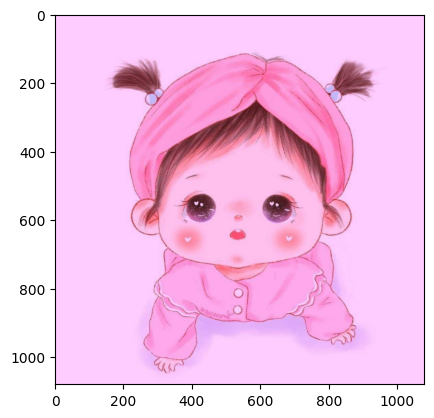

In [148]:
import numpy as np
from PIL import Image

# Đọc hình ảnh màu
image = Image.open('../Handling-Processing/baby.jpg')

# Chuyển đổi hình ảnh thành mảng NumPy
image_array = np.array(image)

# Tính toán mức điều chỉnh
pink_multiplier = 1.2  # Tăng màu hồng

# Điều chỉnh các kênh màu
adjusted_image_array = image_array.copy()
adjusted_image_array[:, :, 0] = np.clip(adjusted_image_array[:, :, 0], 0, 255)  # Kênh màu đỏ
adjusted_image_array[:, :, 1] = np.clip(adjusted_image_array[:, :, 1] * 0.8, 0, 255)  # Kênh màu xanh lá cây
adjusted_image_array[:, :, 2] = np.clip(adjusted_image_array[:, :, 2], 0, 255)  # Kênh màu xanh

# Tạo hình ảnh từ mảng điều chỉnh
# adjusted_image = Image.fromarray(adjusted_image_array)

# Hiển thị hình ảnh
plt.imshow(adjusted_image_array)


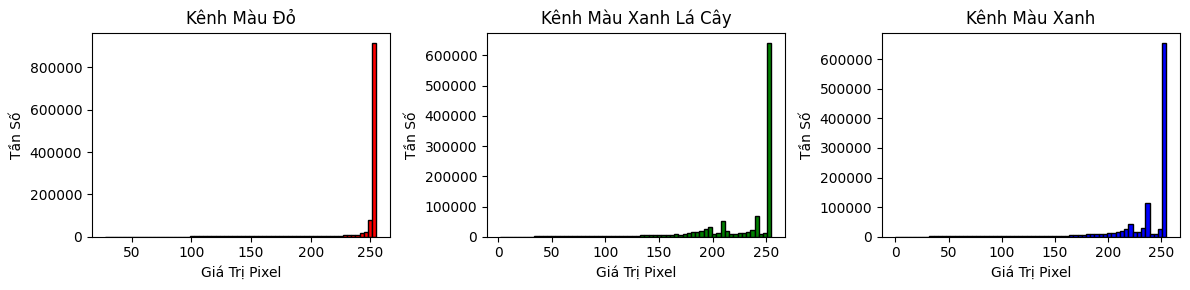

In [153]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Đọc hình ảnh màu
image = Image.open('../Handling-Processing/baby.jpg')

# Chuyển đổi hình ảnh thành mảng NumPy
image_array = np.array(image)

# Tách các kênh màu
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# Tạo histogram cho từng kênh màu
plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.hist(red_channel.flatten(), bins=64, color='red', edgecolor='black')
plt.title('Kênh Màu Đỏ')
plt.xlabel('Giá Trị Pixel')
plt.ylabel('Tần Số')

plt.subplot(132)
plt.hist(green_channel.flatten(), bins=64, color='green', edgecolor='black')
plt.title('Kênh Màu Xanh Lá Cây')
plt.xlabel('Giá Trị Pixel')
plt.ylabel('Tần Số')

plt.subplot(133)
plt.hist(blue_channel.flatten(), bins=64, color='blue', edgecolor='black')
plt.title('Kênh Màu Xanh')
plt.xlabel('Giá Trị Pixel')
plt.ylabel('Tần Số')

plt.tight_layout()
plt.show()
